In [1]:
import pathlib 
data_dir = pathlib.Path("../datasets/big_ds/img-001/")

In [2]:
import pandas as pd 
data = pd.read_csv("../datasets/attribute_set/list_attr_img.txt", delim_whitespace=True, names= ['paths'] + list(range(1000)))

In [3]:
data.shape 

(289222, 1001)

In [4]:
attributes = pd.read_csv("../datasets/attribute_set/list_attr_cloth.txt", delimiter='\s{2,}',  engine='python', skipinitialspace=True)
attributes.head() 

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [5]:
attributes.attribute_name = [item + f"_{i}" for i,item in enumerate(attributes.attribute_name)]
attributes.head() 

,attribute_name,attribute_type
0,a-line_0,3
1,abstract_1,1
2,abstract chevron_2,1
3,abstract chevron print_3,1
4,abstract diamond_4,1


In [6]:
columns_fine_grained = pd.read_csv("../datasets/attribute_set/fine_grained_column_names.txt", header=None, delimiter=" ").to_numpy().squeeze()

In [7]:
data.columns = ["paths"] + list(attributes.attribute_name.values)
data.head() 

,paths,a-line_0,abstract_1,abstract chevron_2,abstract chevron print_3,abstract diamond_4,abstract floral_5,abstract floral print_6,abstract geo_7,abstract geo print_8,...,zeppelin_990,zig_991,zigzag_992,zip_993,zip-front_994,zip-pocket_995,zip-up_996,zipped_997,zipper_998,zippered_999
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [8]:
li = [] 

for col in data.columns[1:]:
    [li.append(i) for i in data[col].value_counts().keys().tolist()]

set(li)

{-1, 1}

In [9]:
import numpy as np 
arr = data.iloc[:, 1:].to_numpy() 
arr = np.where(arr == -1, 0, arr)
# arr = np.where(arr == 1, 1, arr)

In [10]:
data = pd.concat([
    data.iloc[:, 0],
    pd.DataFrame(arr, columns=data.columns.tolist()[1:])
], axis=1) 

In [11]:
data[list(filter(lambda x: 'floral' in x, attributes.attribute_name))].any(axis=1).astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
289217    0
289218    0
289219    0
289220    0
289221    0
Length: 289222, dtype: int32

In [12]:
coarse_attributes_in_fine = [] 
problem_atts = [] 
found_atts = [] 

fresh = pd.DataFrame()
fresh["paths"] = data.paths.copy() 
fresh.index = data.index.copy() 

for fine_attribute in columns_fine_grained: 
    coarse_atts = list(filter(lambda x: fine_attribute in str(x), data.columns)) 
    if coarse_atts is None or len(coarse_atts) == 0:
        problem_atts.append(fine_attribute)
    else:
        found_atts.append(fine_attribute)
        f = pd.DataFrame(data[coarse_atts].any(axis=1).astype(int), columns=[fine_attribute], index=data.index.copy())
        fresh = pd.merge(fresh, f, left_index=True, right_index=True)

fresh.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,sleeveless,denim,chiffon,cotton,leather,faux,knit,loose
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


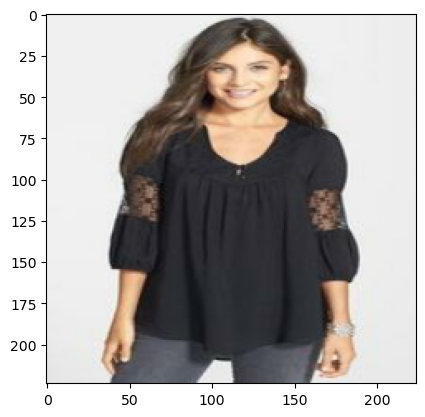

In [13]:
from helpers import show_image 
import random 

p = "../datasets/big_ds/img-001/" + fresh[fresh.graphic == 1].iat[random.randint(0,100),0]
show_image(p)

In [14]:
found_atts

['floral',
 'graphic',
 'striped',
 'embroidered',
 'pleated',
 'solid',
 'lattice',
 'sleeveless',
 'denim',
 'chiffon',
 'cotton',
 'leather',
 'faux',
 'knit',
 'loose']

In [15]:
problem_atts

['long_sleeve',
 'short_sleeve',
 'maxi_length',
 'mini_length',
 'no_dress',
 'crew_neckline',
 'v_neckline',
 'square_neckline',
 'no_neckline',
 'tight',
 'conventional']

In [16]:
coarse_atts = list(filter(lambda x: "skinny" in str(x), data.columns)) 
f = pd.DataFrame(data[coarse_atts].any(axis=1).astype(int), columns=["tight"], index=data.index.copy())
fresh = pd.merge(fresh, f, left_index=True, right_index=True)

In [17]:
coarse_atts = list(filter(lambda x: "maxi" in str(x), data.columns)) 
f = pd.DataFrame(data[coarse_atts].any(axis=1).astype(int), columns=["maxi_length"], index=data.index.copy())
fresh = pd.merge(fresh, f, left_index=True, right_index=True)

In [18]:
coarse_atts = list(filter(lambda x: "mini" in str(x), data.columns)) 
f = pd.DataFrame(data[coarse_atts].any(axis=1).astype(int), columns=["mini_length"], index=data.index.copy())
fresh = pd.merge(fresh, f, left_index=True, right_index=True)

In [19]:
coarse_atts = list(filter(lambda x: "long-sleeve" in str(x), data.columns)) 
f = pd.DataFrame(data[coarse_atts].any(axis=1).astype(int), columns=["long_sleeve"], index=data.index.copy())
fresh = pd.merge(fresh, f, left_index=True, right_index=True)

In [20]:
coarse_atts = list(filter(lambda x: "crew neck" in str(x), data.columns)) 
f = pd.DataFrame(data[coarse_atts].any(axis=1).astype(int), columns=["crew_neckline"], index=data.index.copy())
fresh = pd.merge(fresh, f, left_index=True, right_index=True)

In [21]:
coarse_atts = list(filter(lambda x: "v-neck" in str(x), data.columns)) 
f = pd.DataFrame(data[coarse_atts].any(axis=1).astype(int), columns=["v_neckline"], index=data.index.copy())
fresh = pd.merge(fresh, f, left_index=True, right_index=True)

In [22]:
fresh["no_dress"] = ((fresh.maxi_length != 1) & (fresh.mini_length != 1)).astype(int).replace({0:None, 1:1})
fresh["square_neckline"] = None
fresh["no_neckline"] = None 
fresh["short_sleeve"] = None 
fresh["conventional"] = None 

In [23]:
fresh.paths = fresh.paths.apply(lambda x: "../datasets/big_ds/img-001/" + x) 

In [24]:
fine_grained_data = pd.read_csv("../datasets/attribute_set/train_val_data_fine_grained_all.csv", index_col=0) 
fine_grained_data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img-001/img/Sweet_Crochet_B...,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,../datasets/big_ds/img-001/img/Classic_Pencil_...,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,../datasets/big_ds/img-001/img/Strapless_Diamo...,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,../datasets/big_ds/img-001/img/Mid-Rise_-_Acid...,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img-001/img/Zippered_Single...,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
pd.merge(fine_grained_data, fresh, on='paths', how='inner').shape 

(16000, 53)

In [26]:
fresh = fresh[~fresh.paths.isin(fine_grained_data.paths.unique())]

In [27]:
fresh = fresh[["paths"] + sorted(fresh.columns.tolist()[1:])]

In [28]:
fine_grained_data = fine_grained_data[["paths"] + sorted(fine_grained_data.columns.tolist()[1:])]

In [31]:
fine_grained_data.shape, fresh.shape 

((16000, 27), (273222, 27))

In [42]:
X = fine_grained_data.iloc[:, 0]
y = fine_grained_data.iloc[:, 1:]

,chiffon,conventional,cotton,crew_neckline,denim,embroidered,faux,floral,graphic,knit,...,no_dress,no_neckline,pleated,short_sleeve,sleeveless,solid,square_neckline,striped,tight,v_neckline
0,1,1,0,0,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
2,0,1,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1996,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1997,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1998,0,1,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(fine_grained_data.iloc[:, 0], 
                                                    fine_grained_data.iloc[:, 1:],
                                                    test_size=0.70,
                                                    random_state=47) 

X_val, X_test, y_val, y_test = train_test_split(X_test, 
                                                y_test,
                                                test_size=0.50,
                                                random_state=47)

X_val.shape, X_test.shape, X_train.shape 

((5600,), (5600,), (4800,))

In [45]:
validation = pd.concat([X_val, y_val], axis=1).reset_index(drop=True) 
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True) 
train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True) 
train = pd.concat([train, fresh], axis=0).reset_index(drop=True) 

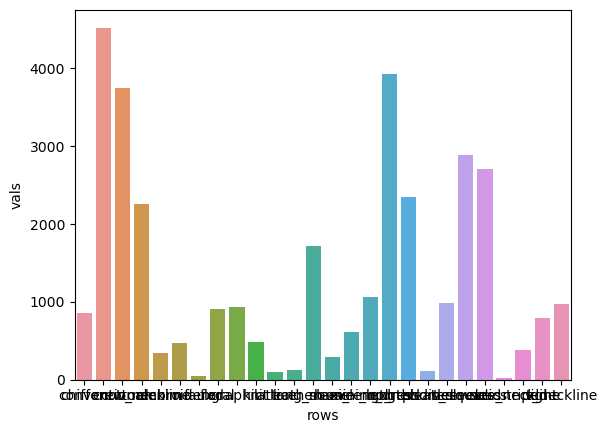

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt 

def show_distribution(dt: pd.DataFrame):
    train_dist = dict()
    for c in dt.columns[1:]: 
        train_dist[c] = len(dt[dt[c] == 1]) 

    train_dist = pd.DataFrame.from_dict(train_dist, orient="index").reset_index()
    train_dist.columns= ["rows", "vals"]

    sns.barplot(x="rows", y="vals", data=train_dist)
    plt.show()

show_distribution(validation)

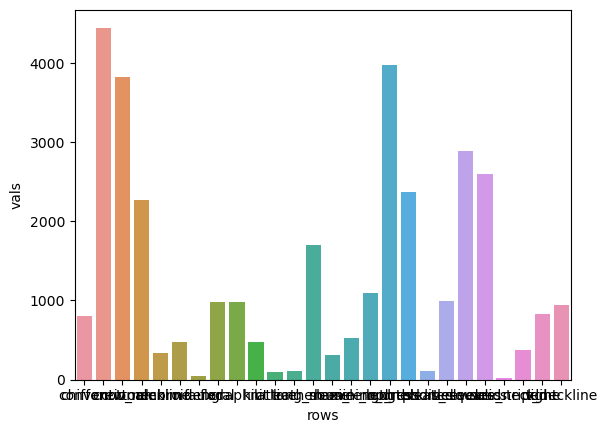

In [49]:
show_distribution(test)

In [51]:
validation.to_csv("../datasets/data_support/validation.csv")

In [54]:
test.to_csv("../datasets/data_support/test.csv")
train.to_csv("../datasets/data_support/train.csv")

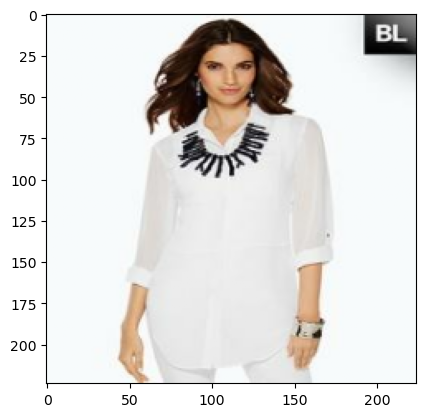

In [395]:
p = "../datasets/big_ds/img-001/" + fresh[fresh.no_dress == 1].iat[random.randint(100,300),0]
show_image(p)

# Save the dataset with helpers 

In [24]:
def to_csv(dataframe: pd.DataFrame, path:str): 
    """
        It save the dataframe into the folder which path points. 
        Also, it will add the dtypes as a record as a last row. 
    """ 
    dataframe.loc[-1] = dataframe.dtypes 
    dataframe.index = dataframe.index + 1 
    dataframe.sort_index(inplace=True) 
    dataframe.to_csv(path, index=False) 

def read_csv_with_dtypes(path:str):
    """
        CSV file has to have its dtypes at the last row. 
    """
    dtypes = pd.read_csv(path, nrows=1).iloc[0].to_dict() 
    return pd.read_csv(path, dtype=dtypes, skiprows=[1])  
    

In [26]:
to_csv(data, "../datasets/attribute_set/custom_attr.csv")